### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Cargar bases y agregar columna "Tienda"
clientes1 = pd.read_csv(url)
clientes1["Tienda"] = "Tienda 1"

clientes2 = pd.read_csv(url2)
clientes2["Tienda"] = "Tienda 2"

clientes3 = pd.read_csv(url3)
clientes3["Tienda"] = "Tienda 3"

clientes4 = pd.read_csv(url4)
clientes4["Tienda"] = "Tienda 4"

In [4]:
# Unir todas las bases en un solo DataFrame
clientes = pd.concat([clientes1, clientes2, clientes3, clientes4], ignore_index=True)

In [5]:
# Revisar que se unieron correctamente
clientes.head()
clientes["Tienda"].value_counts()

,count
Tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [6]:
clientes.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1


In [57]:
clientes.shape

(9435, 18)

In [58]:
clientes.dtypes


,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,datetime64[ns]
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#1. Análisis de facturación



In [8]:
pd.set_option('display.float_format', '{:,.0f}'.format)

# Ahora puedes ver cualquier suma sin notación científica
clientes.groupby("Tienda")["Precio"].sum()

,Precio
Tienda,
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


In [11]:
#Especificamos el formato de la fecha

clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], format="%d/%m/%Y")


In [15]:
#Crear una columna con el mes
clientes["Mes"] = clientes["Fecha de Compra"].dt.to_period("M")

In [55]:
#Compras por mes

clientes["Mes"] = clientes["Fecha de Compra"].dt.to_period("M")

facturacion_mensual = clientes.groupby(["Tienda", "Mes"])["Precio"].sum().unstack(0)


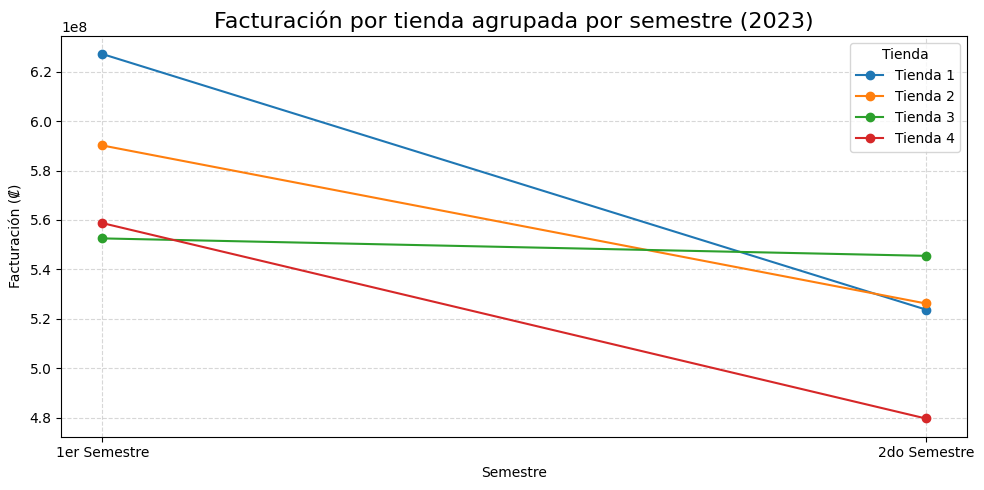

In [24]:
import matplotlib.pyplot as plt

# Paso 1: Asegurar formato de fecha
clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)

# Paso 2: Crear columna 'Semestre'
clientes["Semestre"] = clientes["Fecha de Compra"].dt.month.apply(
    lambda x: "1er Semestre" if x <= 6 else "2do Semestre"
)

# Paso 3: Agrupar por Tienda y Semestre
facturacion_semestral = clientes.groupby(["Semestre", "Tienda"])["Precio"].sum().unstack()

# Paso 4: Ordenar semestres para graficar correctamente
facturacion_semestral = facturacion_semestral.loc[["1er Semestre", "2do Semestre"]]

# Paso 5: Graficar
plt.figure(figsize=(10, 5))
for tienda in facturacion_semestral.columns:
    plt.plot(facturacion_semestral.index, facturacion_semestral[tienda], marker='o', label=tienda)

# Personalización
plt.title("Facturación por tienda agrupada por semestre (2023)", fontsize=16)
plt.xlabel("Semestre")
plt.ylabel("Facturación (₡)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


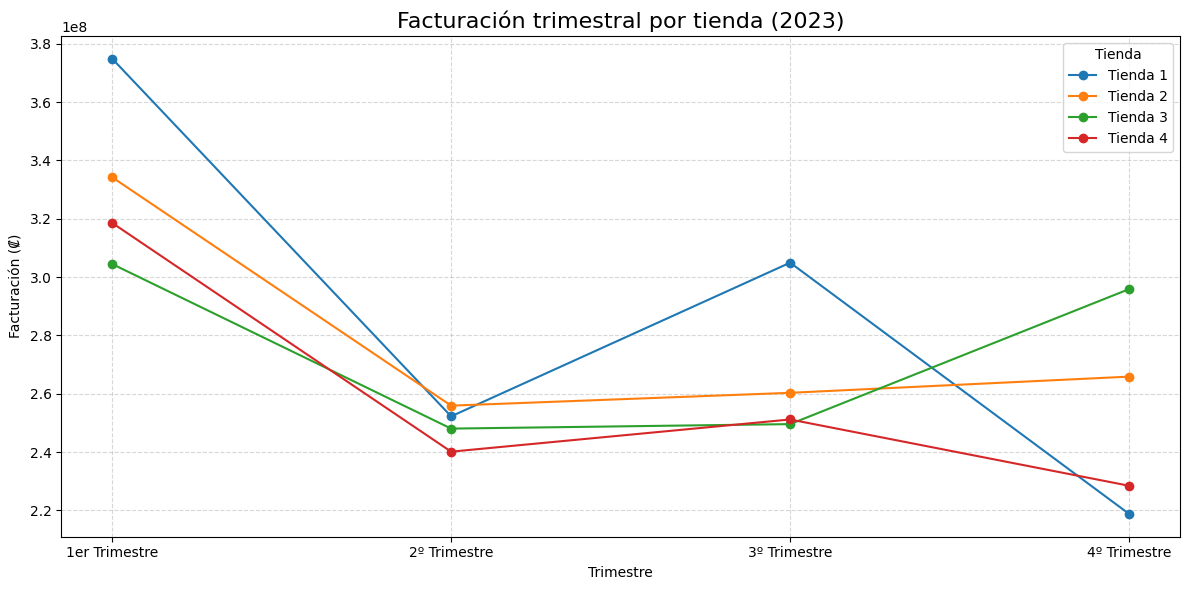

In [25]:
import matplotlib.pyplot as plt

# Paso 1: Asegurar que las fechas estén bien formateadas
clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)

# Paso 2: Crear columna 'Trimestre'
clientes["Trimestre"] = clientes["Fecha de Compra"].dt.quarter.apply(
    lambda x: f"{x}er Trimestre" if x == 1 else f"{x}º Trimestre"
)

# Paso 3: Agrupar facturación por Trimestre y Tienda
facturacion_trimestral = clientes.groupby(["Trimestre", "Tienda"])["Precio"].sum().unstack()

# Paso 4: Ordenar los trimestres en el orden correcto
orden_trimestres = ["1er Trimestre", "2º Trimestre", "3º Trimestre", "4º Trimestre"]
facturacion_trimestral = facturacion_trimestral.loc[orden_trimestres]

# Paso 5: Graficar
plt.figure(figsize=(12, 6))
for tienda in facturacion_trimestral.columns:
    plt.plot(facturacion_trimestral.index, facturacion_trimestral[tienda], marker='o', label=tienda)

# Personalización
plt.title("Facturación trimestral por tienda (2023)", fontsize=16)
plt.xlabel("Trimestre")
plt.ylabel("Facturación (₡)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


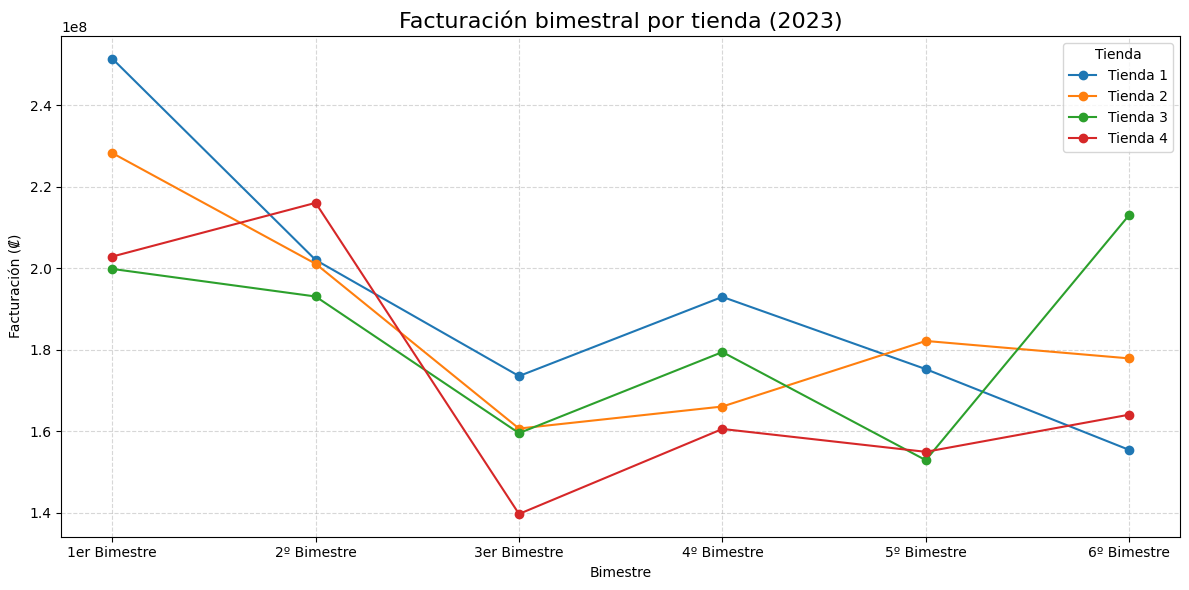

In [31]:
import matplotlib.pyplot as plt

# Asegurar fechas
clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)

# Crear columna 'Bimestre'
def asignar_bimestre(mes):
    if mes <= 2:
        return "1er Bimestre"
    elif mes <= 4:
        return "2º Bimestre"
    elif mes <= 6:
        return "3er Bimestre"
    elif mes <= 8:
        return "4º Bimestre"
    elif mes <= 10:
        return "5º Bimestre"
    else:
        return "6º Bimestre"

clientes["Bimestre"] = clientes["Fecha de Compra"].dt.month.apply(asignar_bimestre)

# Agrupar por Bimestre y Tienda
facturacion_bimestral = clientes.groupby(["Bimestre", "Tienda"])["Precio"].sum().unstack()

# Asegurar orden correcto de los bimestres
orden_bimestres = [
    "1er Bimestre", "2º Bimestre", "3er Bimestre",
    "4º Bimestre", "5º Bimestre", "6º Bimestre"
]
facturacion_bimestral = facturacion_bimestral.loc[orden_bimestres]

# Graficar
plt.figure(figsize=(12, 6))
for tienda in facturacion_bimestral.columns:
    plt.plot(facturacion_bimestral.index, facturacion_bimestral[tienda], marker='o', label=tienda)

# Personalización
plt.title("Facturación bimestral por tienda (2023)", fontsize=16)
plt.xlabel("Bimestre")
plt.ylabel("Facturación (₡)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.savefig("facturacion_bimestral_lineas.png", dpi=300, bbox_inches='tight')
plt.show()



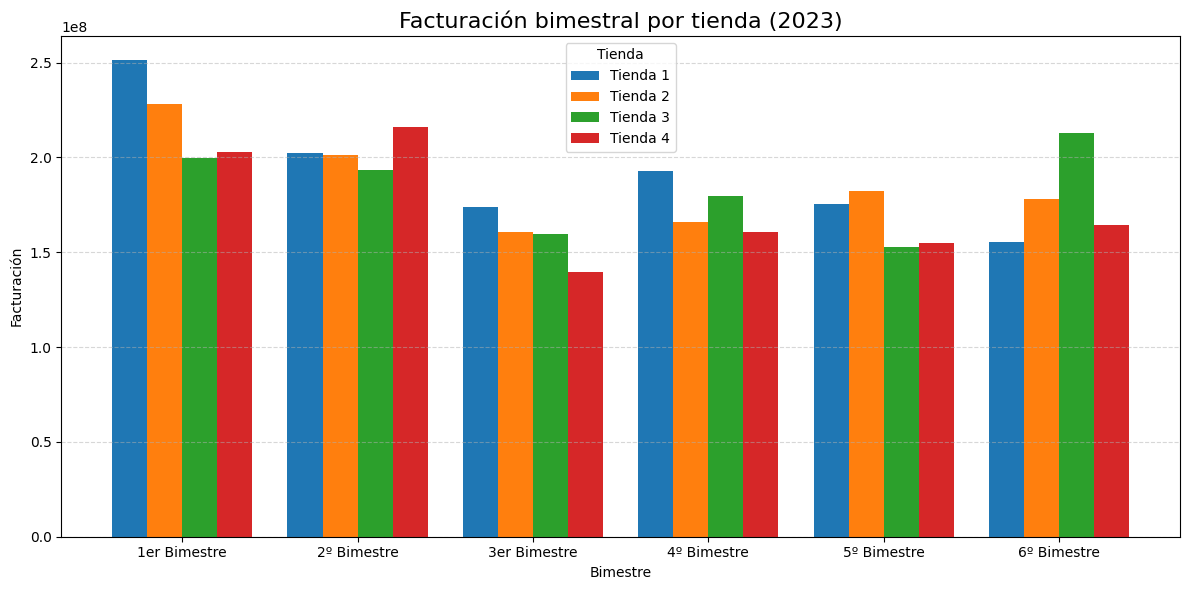

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que los datos están listos
# Ya deberías tener creada la tabla facturacion_bimestral con orden correcto:
# columnas: Tiendas | filas: Bimestres

# Paso 1: Preparar posiciones para las barras
bimestres = facturacion_bimestral.index
tiendas = facturacion_bimestral.columns
x = np.arange(len(bimestres))  # posiciones de los bimestres
width = 0.2                    # ancho de cada barra

# Paso 2: Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

# Dibujar una barra por cada tienda, desplazada
for i, tienda in enumerate(tiendas):
    plt.bar(
        x + i * width,
        facturacion_bimestral[tienda],
        width=width,
        label=tienda
    )

# Paso 3: Personalización
plt.title("Facturación bimestral por tienda (2023)", fontsize=16)
plt.xlabel("Bimestre")
plt.ylabel("Facturación")
plt.xticks(x + width * (len(tiendas) - 1) / 2, bimestres)  # Centrar etiquetas
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.savefig("facturacion_bimestral.png", dpi=300, bbox_inches='tight')
plt.show()


🟦 Tienda 1: Empezó como líder, pero pierde ritmo en los últimos bimestres.
🟧 Tienda 2: Siempre está en el podio, con buen rendimiento sostenido.
🟩 Tienda 3: Comienza débil, pero cierra fuerte en el 6.º bimestre. Potencial de crecimiento.
🟥 Tienda 4: Rendimiento más irregular. Cae en el 3.º y 5.º bimestre.


Recomendación estratégica basada en el gráfico

Tienda 3 podría ser interesante para invertir, ya que muestra señales de crecimiento en el cierre del año.

Tienda 1, aunque es la que más factura en general, está perdiendo impulso; conviene revisar si hay problemas de operación o demanda.

Tienda 2 es sólida y confiable, ideal para estabilidad.

Tienda 4 es la más volátil; si se desea vender una tienda con menor proyección, sería la candidata natural.

In [33]:
#Ticket promedio por tienda

ticket_promedio = clientes.groupby("Tienda")["Precio"].mean()

ticket_promedio


,Precio
Tienda,
Tienda 1,"487,868"
Tienda 2,"473,227"
Tienda 3,"465,460"
Tienda 4,"440,363"


In [40]:
#Evolución de la facturación acumulada (Para ver cómo creció la facturación mes a mes en el año.)

clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)
clientes["Mes"] = clientes["Fecha de Compra"].dt.to_period("M")
facturacion_mensual = clientes.groupby(["Mes", "Tienda"])["Precio"].sum().unstack()
facturacion_acumulada = facturacion_mensual.cumsum()

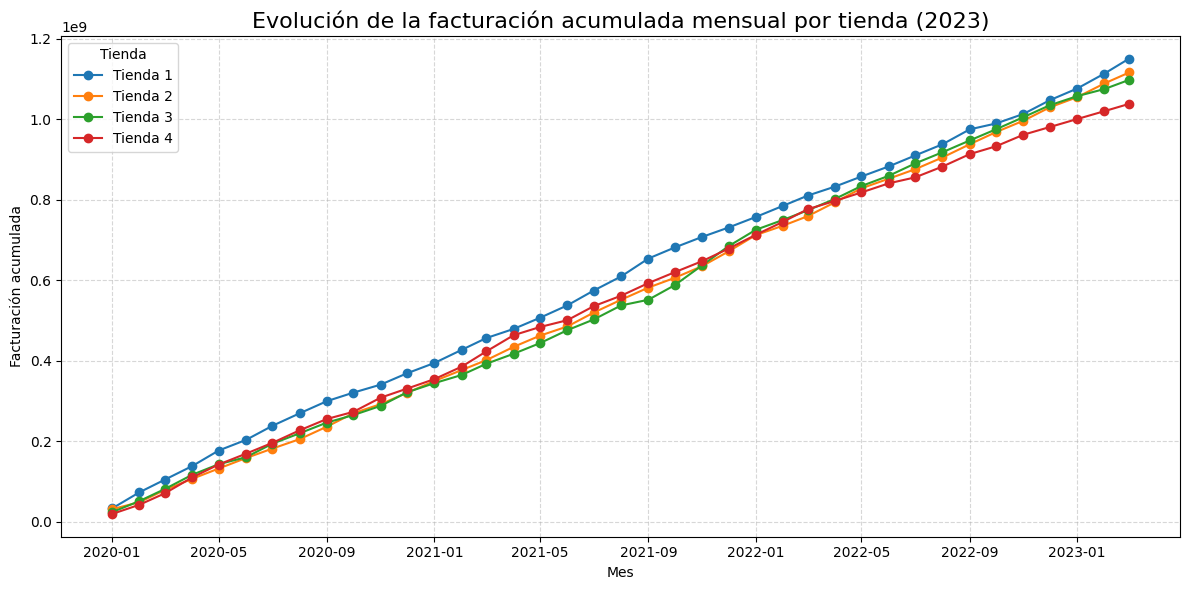

In [45]:
import matplotlib.pyplot as plt

# Asegurar formato de fecha y columna mensual
clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)
clientes["Mes"] = clientes["Fecha de Compra"].dt.to_period("M")

# Agrupar facturación mensual por tienda
facturacion_mensual = clientes.groupby(["Mes", "Tienda"])["Precio"].sum().unstack()

# Calcular acumulado mes a mes
facturacion_acumulada = facturacion_mensual.cumsum()
facturacion_acumulada.index = facturacion_acumulada.index.to_timestamp()

# Graficar
plt.figure(figsize=(12, 6))
for tienda in facturacion_acumulada.columns:
    plt.plot(facturacion_acumulada.index, facturacion_acumulada[tienda], marker='o', label=tienda)

# Personalización
plt.title("Evolución de la facturación acumulada mensual por tienda (2023)", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Facturación acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.savefig("facturacion_acumulada_mensual.png", dpi=300, bbox_inches='tight')
plt.show()


📊 Interpretación del gráfico
1. 🥇 Tienda 1 mantiene el liderazgo

La línea azul (Tienda 1) se mantiene por encima de todas las demás a lo largo del período.

Esto indica que, desde el inicio hasta el final, Tienda 1 factura de forma constante y superior al resto.

Además, su pendiente (ritmo de crecimiento) es estable y no presenta caídas visibles.

2. 📈 Tienda 2 y Tienda 3 compiten de cerca

Ambas líneas (naranja y verde) tienen trayectorias muy similares.

En algunos puntos Tienda 3 supera a Tienda 2, pero en general se mantienen parejas, con buen desempeño.

Sus pendientes también son estables, lo que sugiere un crecimiento sano.

3. 🔻 Tienda 4 se queda atrás

La línea roja (Tienda 4) siempre se mantiene por debajo de las demás.

Aunque crece de manera constante, su ritmo de acumulación es más lento.

Es la que menos aporta al total acumulado de facturación.

In [39]:
#Facturación por día de la semana

clientes["Día Semana"] = clientes["Fecha de Compra"].dt.day_name()
facturacion_dia = clientes.groupby(["Tienda", "Día Semana"])["Precio"].sum().unstack()


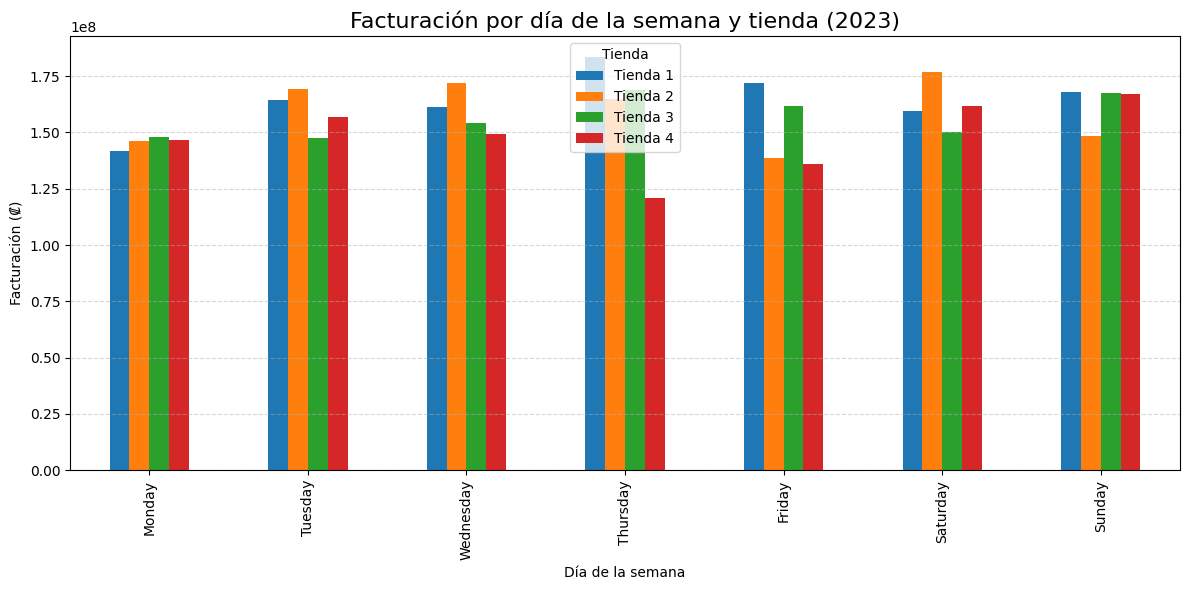

In [46]:
import matplotlib.pyplot as plt

# Asegurar formato de fecha y crear columna 'Día de la semana'
clientes["Fecha de Compra"] = pd.to_datetime(clientes["Fecha de Compra"], dayfirst=True)
clientes["Día Semana"] = clientes["Fecha de Compra"].dt.day_name()

# Agrupar facturación por tienda y día
facturacion_dia = clientes.groupby(["Día Semana", "Tienda"])["Precio"].sum().unstack()

# Ordenar los días de la semana (opcional)
dias_orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
facturacion_dia = facturacion_dia.loc[dias_orden]

# Graficar
facturacion_dia.plot(kind='bar', figsize=(12, 6))
plt.title("Facturación por día de la semana y tienda (2023)", fontsize=16)
plt.xlabel("Día de la semana")
plt.ylabel("Facturación (₡)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


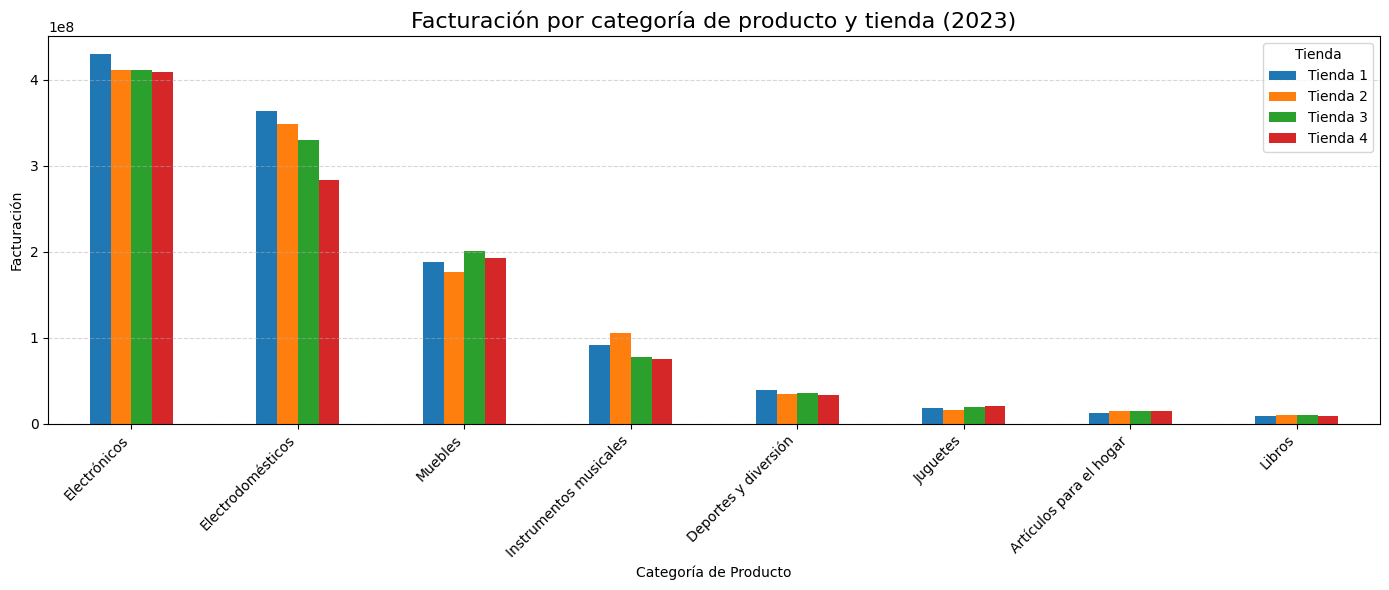

In [41]:
#Contribución de cada tienda al total

clientes.groupby("Tienda")["Precio"].sum() / clientes["Precio"].sum()

,Precio
Tienda,
Tienda 1,0
Tienda 2,0
Tienda 3,0
Tienda 4,0


In [42]:
#Facturación por método de pago

facturacion_pago = clientes.groupby(["Tienda", "Método de pago"])["Precio"].sum().unstack(fill_value=0)


In [43]:
#Cantidad de transacciones vs facturación (Permite ver si las tiendas venden mucho en pocas ventas grandes, o muchas ventas pequeñas.)

clientes.groupby("Tienda")["Precio"].agg(["sum", "count", "mean"])


,sum,count,mean
Tienda,,,
Tienda 1,"1,150,880,400",2359,"487,868"
Tienda 2,"1,116,343,500",2359,"473,227"
Tienda 3,"1,098,019,600",2359,"465,460"
Tienda 4,"1,038,375,700",2358,"440,363"


# 2. Ventas por categoría

In [51]:
#Facturación por categoría de producto

facturacion_categoria = clientes.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum().sort_values(ascending=False)


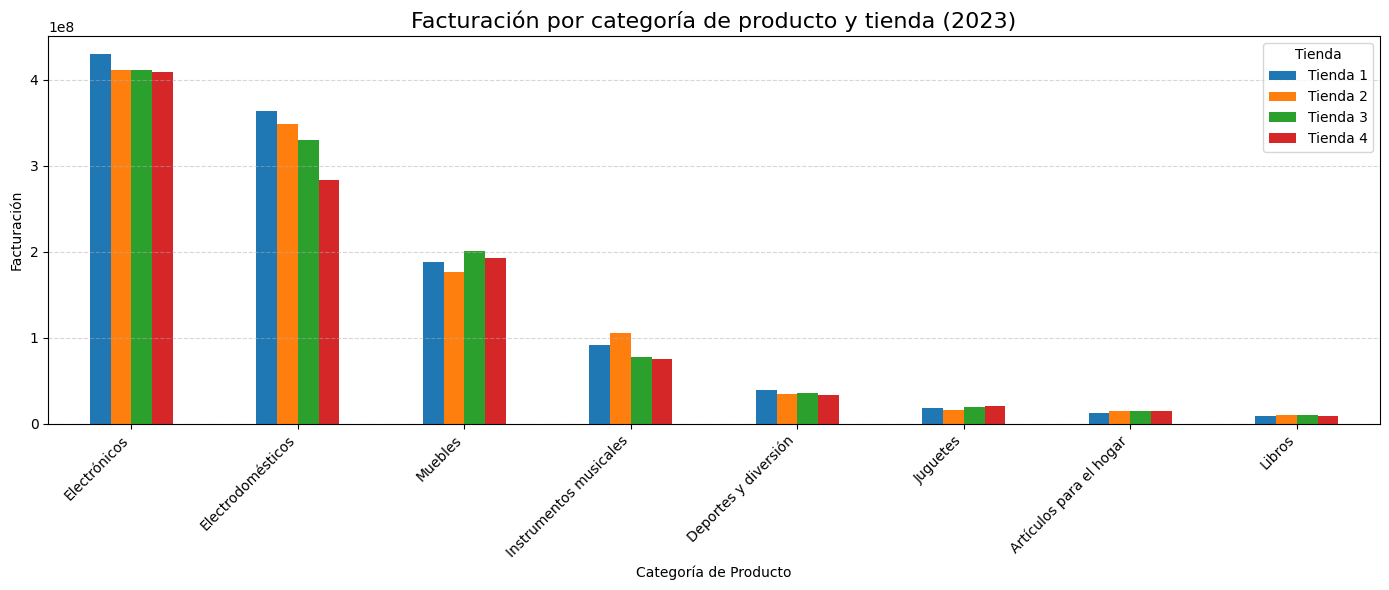

In [50]:
import matplotlib.pyplot as plt

# Agrupar por categoría y tienda
facturacion_categoria = clientes.groupby(["Categoría del Producto", "Tienda"])["Precio"].sum().unstack()

# Ordenar categorías por facturación total (opcional)
categorias_ordenadas = facturacion_categoria.sum(axis=1).sort_values(ascending=False).index
facturacion_categoria = facturacion_categoria.loc[categorias_ordenadas]

# Graficar
facturacion_categoria.plot(kind='bar', figsize=(14, 6))
plt.title("Facturación por categoría de producto y tienda (2023)", fontsize=16)
plt.xlabel("Categoría de Producto")
plt.ylabel("Facturación")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Tienda")
plt.tight_layout()
plt.savefig("facturacion_categoria_tienda.png", dpi=300, bbox_inches='tight')
plt.show()

In [52]:
import pandas as pd

# Agrupar facturación total por categoría y tienda
facturacion_categoria = clientes.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum()

# Calcular el total por tienda
total_por_tienda = facturacion_categoria.groupby(level=0).sum()

# Calcular porcentaje por categoría respecto al total de cada tienda
participacion_por_categoria = facturacion_categoria / total_por_tienda

# Formatear en porcentaje (opcional)
participacion_por_categoria = participacion_por_categoria.mul(100).round(2)

# Convertir a tabla más legible (filas = categorías, columnas = tiendas)
participacion_por_categoria = participacion_por_categoria.unstack().T

# Mostrar resultado
participacion_por_categoria


Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,1,1,1,1
Deportes y diversión,3,3,3,3
Electrodomésticos,32,31,30,27
Electrónicos,37,37,37,39
Instrumentos musicales,8,9,7,7
Juguetes,2,1,2,2
Libros,1,1,1,1
Muebles,16,16,18,19


# 3. Calificación promedio de la tienda


In [68]:
clientes["Calificación"] = clientes["Calificación"].astype(float)

In [73]:
clientes["Calificación"].dtype

dtype('float64')

In [74]:
clientes.groupby("Tienda")["Calificación"].mean().round(4)

,Calificación
Tienda,
Tienda 1,4
Tienda 2,4
Tienda 3,4
Tienda 4,4


In [70]:
clientes.groupby(["Tienda", "Calificación"]).size().unstack(fill_value=0)

Calificación,1,2,3,4,5
Tienda,,,,,
Tienda 1,319,86,218,444,1292
Tienda 2,273,93,209,482,1302
Tienda 3,297,79,193,434,1356
Tienda 4,310,85,210,453,1300


In [71]:
clientes.groupby("Tienda")["Calificación"].unique()

,Calificación
Tienda,
Tienda 1,"[4.0, 1.0, 5.0, 3.0, 2.0]"
Tienda 2,"[1.0, 3.0, 5.0, 4.0, 2.0]"
Tienda 3,"[4.0, 3.0, 5.0, 1.0, 2.0]"
Tienda 4,"[4.0, 5.0, 3.0, 1.0, 2.0]"


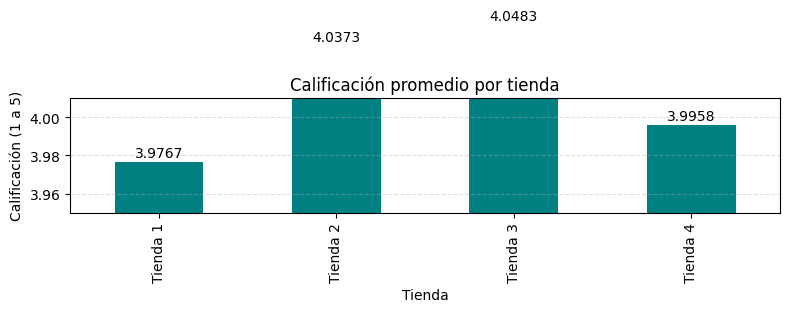

In [72]:
import matplotlib.pyplot as plt

cal_prom = clientes.groupby("Tienda")["Calificación"].mean().round(4)

ax = cal_prom.plot(kind="bar", figsize=(8,5), color="teal")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(3.95, 4.01)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Agregar etiquetas sobre cada barra
for i, v in enumerate(cal_prom):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [78]:
# Agrupar por Tienda, Producto y Categoría
top_vendidos = (
    clientes.groupby(["Tienda", "Producto", "Categoría del Producto"])
    .agg(
        Cantidad_vendida=("Producto", "count"),
        Ingreso_total=("Precio", "sum")
    )
    .reset_index()
)

# Seleccionar Top 5 por Tienda
top_5 = (
    top_vendidos
    .sort_values(["Tienda", "Cantidad_vendida"], ascending=[True, False])
    .groupby("Tienda")
    .head(5)
)

top_5


,Tienda,Producto,Categoría del Producto,Cantidad_vendida,Ingreso_total
1,Tienda 1,Armario,Muebles,60,"29,462,300"
33,Tienda 1,Microondas,Electrodomésticos,60,"34,761,500"
48,Tienda 1,TV LED UHD 4K,Electrónicos,60,"142,150,200"
40,Tienda 1,Secadora de ropa,Electrodomésticos,58,"59,062,400"
9,Tienda 1,Bloques de construcción,Juguetes,56,"1,865,700"
75,Tienda 2,Iniciando en programación,Libros,65,"3,127,800"
84,Tienda 2,Microondas,Electrodomésticos,62,"36,192,000"
58,Tienda 2,Batería,Instrumentos musicales,61,"46,175,300"
72,Tienda 2,Guitarra acústica,Instrumentos musicales,58,"18,648,400"
89,Tienda 2,Pandereta,Instrumentos musicales,58,"3,725,100"


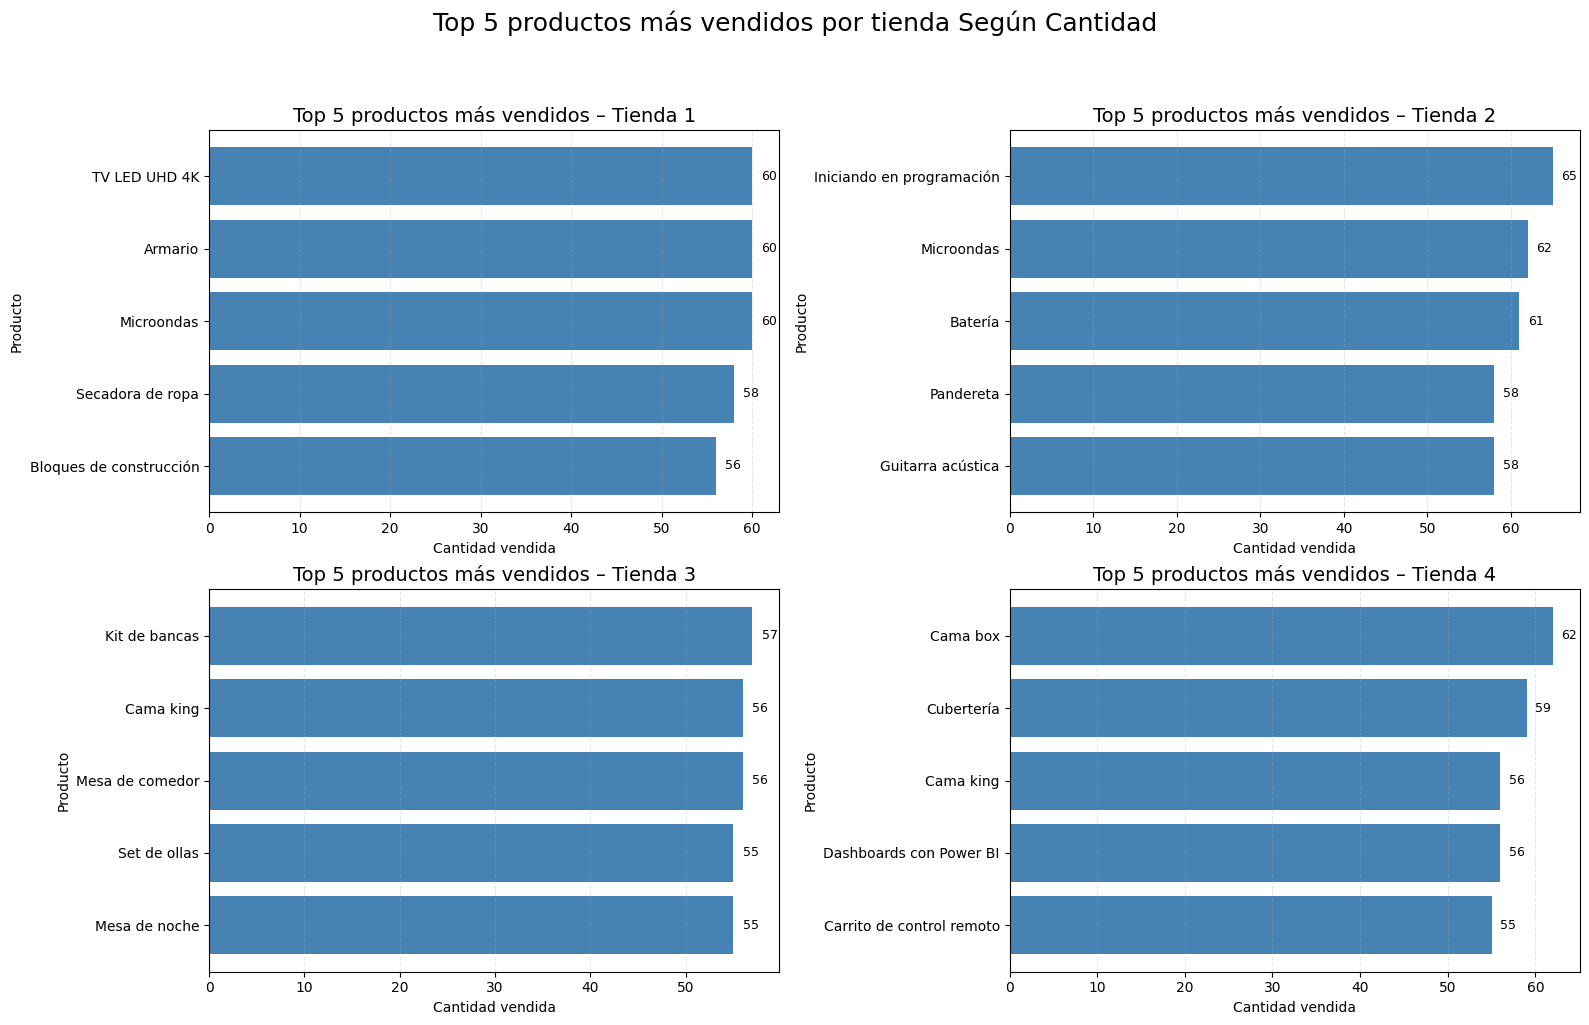

In [84]:
import matplotlib.pyplot as plt

# Asegurarse de que top_5 esté listo (como se generó antes)
# top_5 contiene: Tienda, Producto, Categoría del Producto, Cantidad_vendida, Ingreso_total

# Crear figura con 4 subplots (uno por tienda)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Para iterar más fácil

# Lista de tiendas en orden
tiendas = top_5["Tienda"].unique()

# Crear un subplot por tienda
for i, tienda in enumerate(tiendas):
    datos_tienda = top_5[top_5["Tienda"] == tienda].sort_values("Cantidad_vendida", ascending=True)

    axes[i].barh(datos_tienda["Producto"], datos_tienda["Cantidad_vendida"], color="steelblue")
    axes[i].set_title(f"Top 5 productos más vendidos – {tienda}", fontsize=14)
    axes[i].set_xlabel("Cantidad vendida")
    axes[i].set_ylabel("Producto")
    axes[i].grid(axis="x", linestyle="--", alpha=0.3)

    # Mostrar etiquetas de valor sobre las barras
    for j, v in enumerate(datos_tienda["Cantidad_vendida"]):
        axes[i].text(v + 1, j, str(v), va='center', fontsize=9)

# Ajustes finales
plt.tight_layout()
plt.suptitle("Top 5 productos más vendidos por tienda Según Cantidad", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()


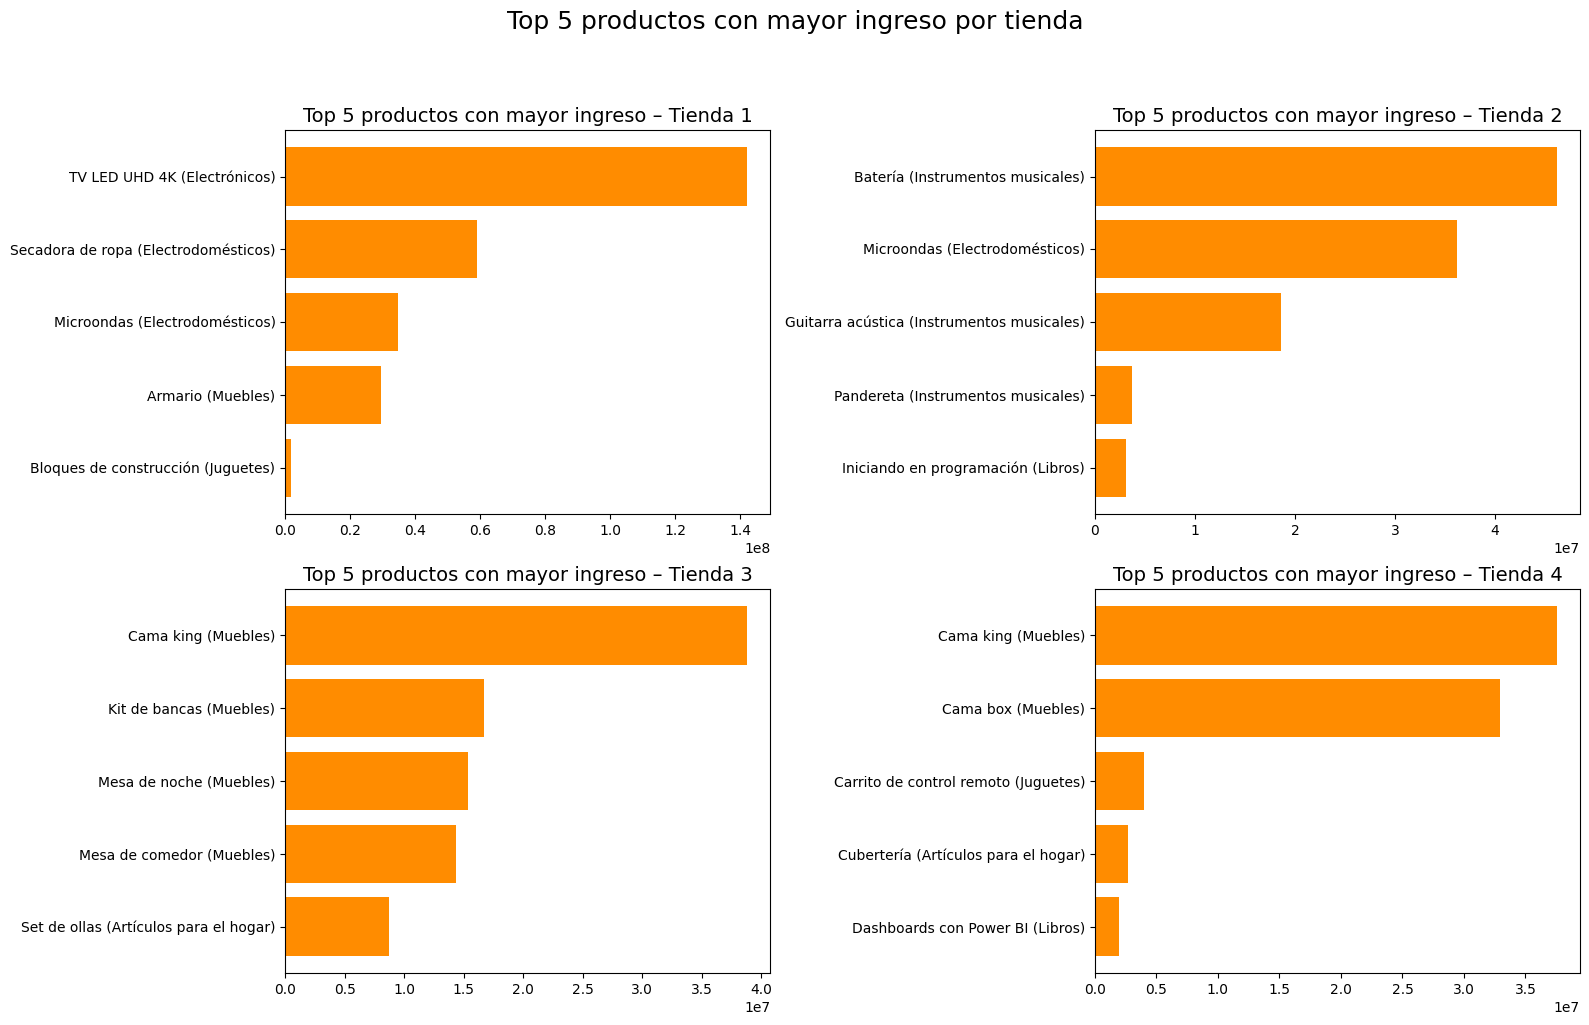

In [83]:
import matplotlib.pyplot as plt

# Crear figura con 4 subplots (uno por tienda)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Lista de tiendas en orden
tiendas = top_5["Tienda"].unique()

# Subplot por tienda
for i, tienda in enumerate(tiendas):
    # Filtrar y ordenar los datos por ingreso total
    datos_tienda = top_5[top_5["Tienda"] == tienda].sort_values("Ingreso_total", ascending=True)

    # Crear nueva etiqueta con nombre del producto + categoría
    etiquetas = datos_tienda.apply(
        lambda row: f"{row['Producto']} ({row['Categoría del Producto']})", axis=1
    )

    # Graficar
    axes[i].barh(etiquetas, datos_tienda["Ingreso_total"], color="darkorange")
    axes[i].set_title(f"Top 5 productos con mayor ingreso – {tienda}", fontsize=14)
    axes

    # Guardar la imagen antes de mostrarla
plt.savefig("top5_ingresos_por_tienda.png", dpi=300, bbox_inches="tight")

# Mostrar en pantalla
plt.tight_layout()
plt.suptitle("Top 5 productos con mayor ingreso por tienda", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()


Interpretación por tienda
🟦 Tienda 1

Producto líder: TV LED UHD 4K (Electrónicos), con diferencia significativa frente a los demás.

También destacan productos de Electrodomésticos como Secadora de ropa y Microondas, y un producto de Muebles.

Lo anterior sugiere una fuerte dependencia de la tienda en la categoría de Electrónica y Electrodomésticos.

Este patrón también se ve reflejado en la alta facturación total mensual y bimestral observada previamente.

🟧 Tienda 2

Producto líder: Batería (Instrumentos musicales), lo que indica un posicionamiento diferenciado respecto a otras tiendas.

Aparecen también productos de Electrodomésticos, Libros y otros instrumentos musicales.

La mezcla sugiere una diversificación moderada, aunque con una inclinación hacia la categoría de Instrumentos musicales.

🟩 Tienda 3

En los 4 primeros puestos dominan los Muebles: cama king, bancas, mesa de noche y comedor.

Esto indica una clara especialización de esta tienda en equipamiento del hogar.

Correlaciona con un patrón de facturación más equilibrado a lo largo del tiempo.

🟥 Tienda 4

Similar a Tienda 3: productos como Cama king, Cama box, y Cubiertería dominan.

También incluye productos de Juguetes y Libros, lo que puede apuntar a una clientela más familiar.

La tienda se posiciona como fuerte en el sector de hogar y familia, lo cual puede ser una ventaja estratégica si se apunta a ese nicho.

Conclusiones estratégicas

Tienda 1 es la más rentable en facturación general y tiene una alta dependencia de productos electrónicos de alto valor.

Tienda 3 y 4 muestran una especialización clara en Muebles y artículos del hogar, lo que puede ser clave para segmentar campañas o enfocar mejoras logísticas.

Tienda 2 diversifica más entre categorías, lo que le da cierta estabilidad, pero no destaca fuertemente en facturación.

El hecho de que algunas tiendas dependan de pocos productos puede representar tanto una ventaja competitiva como un riesgo de concentración si cae la demanda de esos productos.

In [79]:
# Seleccionar Bottom 5 por Tienda (productos con menos unidades vendidas)
bottom_5 = (
    top_vendidos
    .sort_values(["Tienda", "Cantidad_vendida"], ascending=[True, True])
    .groupby("Tienda")
    .head(5)
)

bottom_5


,Tienda,Producto,Categoría del Producto,Cantidad_vendida,Ingreso_total
4,Tienda 1,Auriculares con micrófono,Electrónicos,33,"4,730,800"
13,Tienda 1,Celular ABXY,Electrónicos,33,"32,651,000"
37,Tienda 1,Olla de presión,Artículos para el hogar,35,"2,629,300"
38,Tienda 1,Pandereta,Instrumentos musicales,36,"2,238,900"
14,Tienda 1,Ciencia de datos con Python,Libros,39,"2,063,600"
77,Tienda 2,Juego de mesa,Juguetes,32,"5,811,900"
74,Tienda 2,Impresora,Electrónicos,34,"10,385,300"
82,Tienda 2,Mesa de comedor,Muebles,34,"8,637,500"
95,Tienda 2,Sillón,Muebles,35,"8,413,500"
54,Tienda 2,Auriculares,Electrónicos,37,"3,569,600"


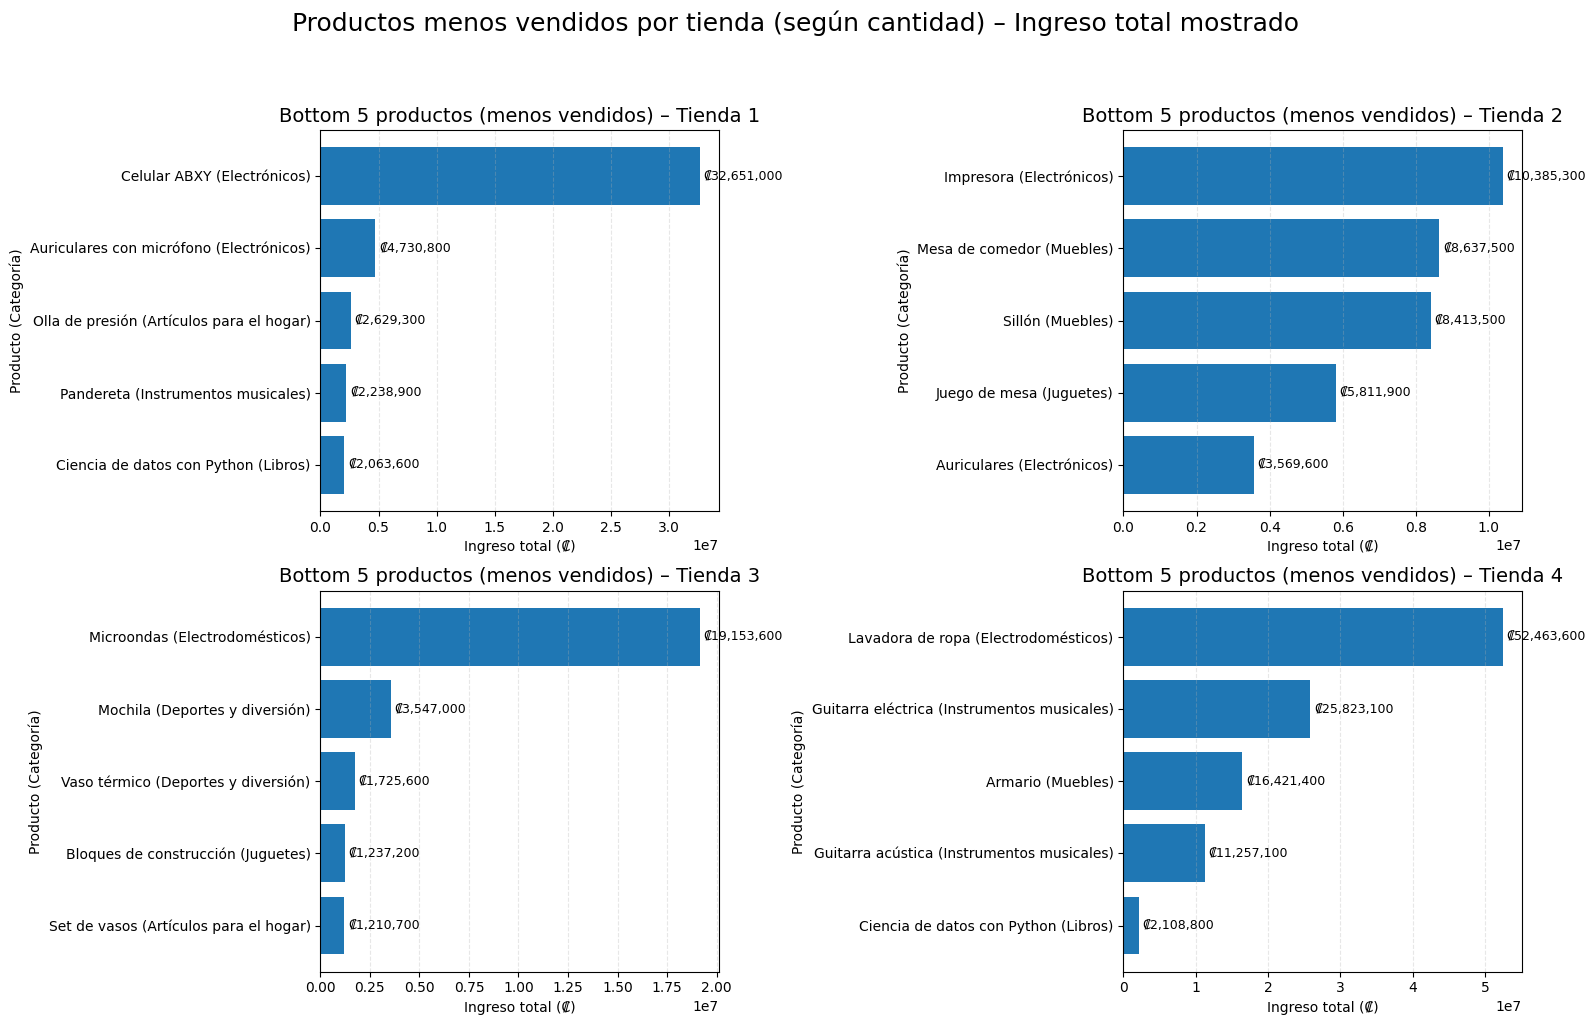

In [85]:
#Productos menos vendidos por tienda

import pandas as pd
import matplotlib.pyplot as plt

# 1) Agregado base: por Tienda–Producto–Categoría
agg_prod = (
    clientes.groupby(["Tienda", "Producto", "Categoría del Producto"])
    .agg(
        Cantidad_vendida=("Producto", "count"),
        Ingreso_total=("Precio", "sum")
    )
    .reset_index()
)

# ========= OPCIÓN A (recomendada): menos vendidos por CANTIDAD =========
bottom_5_qty = (
    agg_prod
    .sort_values(["Tienda", "Cantidad_vendida", "Ingreso_total"], ascending=[True, True, True])
    .groupby("Tienda")
    .head(5)
)

# 2) Gráfico: subplots con barras horizontales (eje Y = Producto (Categoría), X = Ingreso_total)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
tiendas = bottom_5_qty["Tienda"].unique()

for i, tienda in enumerate(tiendas):
    datos = (
        bottom_5_qty[bottom_5_qty["Tienda"] == tienda]
        .sort_values("Ingreso_total", ascending=True)
        .copy()
    )
    # Etiqueta: Producto (Categoría)
    etiquetas = datos.apply(lambda r: f"{r['Producto']} ({r['Categoría del Producto']})", axis=1)

    axes[i].barh(etiquetas, datos["Ingreso_total"])
    axes[i].set_title(f"Bottom 5 productos (menos vendidos) – {tienda}", fontsize=14)
    axes[i].set_xlabel("Ingreso total (₡)")
    axes[i].set_ylabel("Producto (Categoría)")
    axes[i].grid(axis="x", linestyle="--", alpha=0.3)

    # Etiquetas numéricas en las barras
    for j, v in enumerate(datos["Ingreso_total"]):
        axes[i].text(v + max(datos["Ingreso_total"])*0.01, j, f"₡{v:,.0f}", va='center', fontsize=9)

plt.suptitle("Productos menos vendidos por tienda (según cantidad) – Ingreso total mostrado", fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
# plt.savefig("bottom5_menos_vendidos_por_tienda.png", dpi=300, bbox_inches="tight")
plt.show()


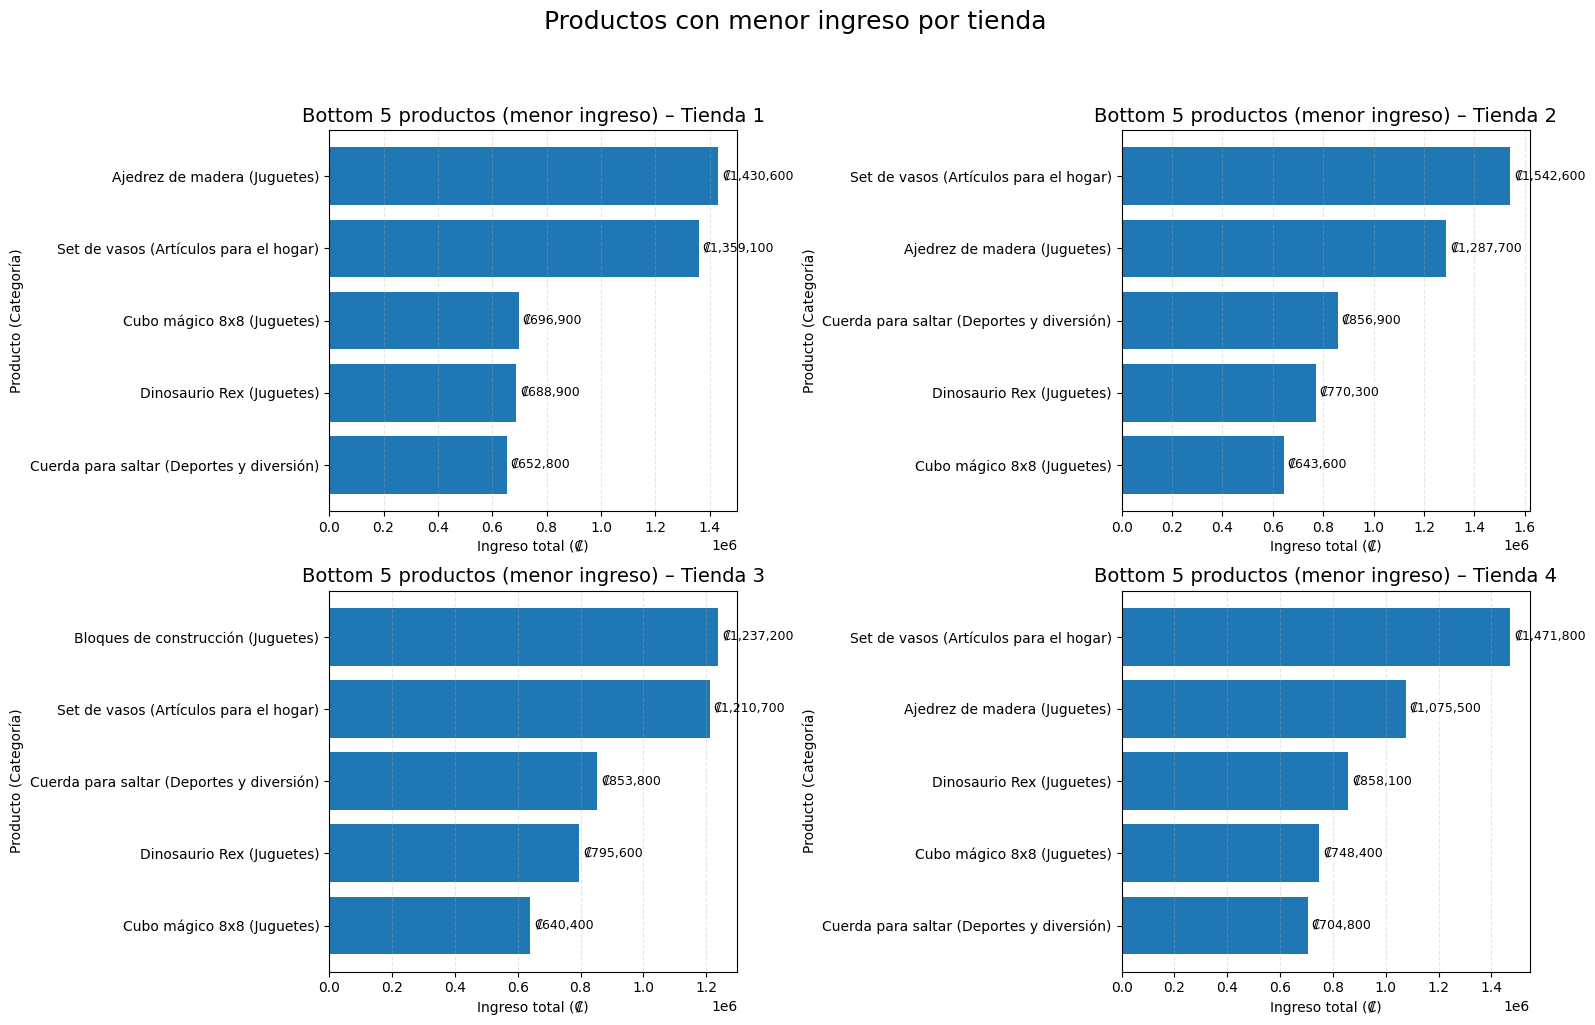

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Agregado base: por Tienda–Producto–Categoría
agg_prod = (
    clientes.groupby(["Tienda", "Producto", "Categoría del Producto"])
    .agg(
        Cantidad_vendida=("Producto", "count"),
        Ingreso_total=("Precio", "sum")
    )
    .reset_index()
)

# ========= OPCIÓN B: menos vendidos por INGRESO (Top 5 con menor ingreso) =========
bottom_5_income = (
    agg_prod
    .sort_values(["Tienda", "Ingreso_total", "Cantidad_vendida"], ascending=[True, True, True])
    .groupby("Tienda")
    .head(5)
)

# 2) Gráfico: subplots con barras horizontales (eje Y = Producto (Categoría), X = Ingreso_total)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
tiendas = bottom_5_income["Tienda"].unique() # Usamos bottom_5_income para obtener las tiendas

for i, tienda in enumerate(tiendas):
    datos = (
        bottom_5_income[bottom_5_income["Tienda"] == tienda]
        .sort_values("Ingreso_total", ascending=True)
        .copy()
    )
    # Etiqueta: Producto (Categoría)
    etiquetas = datos.apply(lambda r: f"{r['Producto']} ({r['Categoría del Producto']})", axis=1)

    axes[i].barh(etiquetas, datos["Ingreso_total"])
    axes[i].set_title(f"Bottom 5 productos (menor ingreso) – {tienda}", fontsize=14)
    axes[i].set_xlabel("Ingreso total (₡)")
    axes[i].set_ylabel("Producto (Categoría)")
    axes[i].grid(axis="x", linestyle="--", alpha=0.3)

    # Etiquetas numéricas en las barras
    for j, v in enumerate(datos["Ingreso_total"]):
        axes[i].text(v + max(datos["Ingreso_total"])*0.01, j, f"₡{v:,.0f}", va='center', fontsize=9)

plt.suptitle("Productos con menor ingreso por tienda", fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("bottom5_menos_vendidos_por_tienda.png", dpi=300, bbox_inches="tight")
# plt.savefig("bottom5_menos_vendidos_por_tienda_ingreso.png", dpi=300, bbox_inches="tight")
plt.show()

Análisis de los productos con menor ingreso por tienda
📌 Observaciones generales:

Patrón de coincidencia entre tiendas

Hay una clara repetición de productos en las cuatro tiendas entre los menos vendidos:

Set de vasos (Artículos para el hogar)

Ajedrez de madera (Juguetes)

Cubo mágico 8x8 (Juguetes)

Dinosaurio Rex (Juguetes)

Cuerda para saltar (Deportes y diversión)

Esto sugiere que el bajo desempeño no es exclusivo de una tienda, sino que responde a una baja demanda general de estos productos.

Categorías más afectadas

Juguetes: representan la mayoría de los productos con bajo ingreso en todas las tiendas.

Artículos para el hogar: aparece en el caso del Set de vasos.

Deportes y diversión: con la Cuerda para saltar, que también se repite en todas las tiendas.

Comparación de ingresos

Aunque los ingresos son menores que en los Top 5, los valores no son despreciables (entre ₡600,000 y ₡1,500,000 por producto).

Esto significa que sí generan ingresos, pero están muy lejos de los productos líderes como TV LED o Camas King, que superan los ₡30-150 millones.

📊 Interpretación estratégica:

Baja demanda estructural

La reiteración de los mismos productos en las 4 tiendas indica que la baja facturación es estructural del mercado y no se debe a problemas logísticos o de inventario de una sola tienda.

Revisión de inventario y estrategia comercial

Reducir inventarios de estos productos, ya que su rotación es baja.

Considerar promociones o combos (ej. incluir set de vasos como obsequio en la compra de electrodomésticos).

Oportunidad de sustitución

Revisar si dentro de las mismas categorías hay productos alternativos con mayor demanda que puedan reemplazar a los de bajo desempeño.

Segmentación de marketing

Los juguetes y artículos de bajo costo pueden dirigirse a campañas específicas para niños o familias, pero no deben ocupar espacio central en las tiendas.

# 5. Envío promedio por tienda

In [93]:
#Calcular el costo de envío promedio por tienda

envio_promedio = clientes.groupby("Tienda")["Costo de envío"].mean().round(3)
envio_promedio


,Costo de envío
Tienda,
Tienda 1,"26,019"
Tienda 2,"25,216"
Tienda 3,"24,806"
Tienda 4,"23,459"


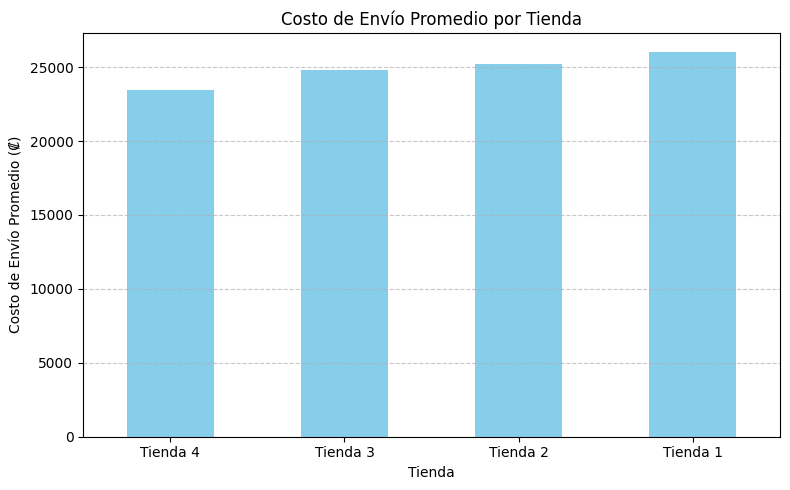

In [94]:
import matplotlib.pyplot as plt

envio_promedio.sort_values().plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo de Envío Promedio (₡)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [95]:
# Calcular el costo de envío como % del ingreso

# Cálculo del ingreso total por tienda
ingreso_total = clientes.groupby("Tienda")["Precio"].sum()

# Cálculo del envío total por tienda
envio_total = clientes.groupby("Tienda")["Costo de envío"].sum()

# Proporción del envío sobre el ingreso
proporcion_envio = (envio_total / ingreso_total * 100).round(2)
proporcion_envio

,0
Tienda,
Tienda 1,5
Tienda 2,5
Tienda 3,5
Tienda 4,5


In [97]:
from google.colab import files
clientes.to_csv("clientes.csv", index=False) # Save the DataFrame to a CSV file
files.download("clientes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Análisis y conclusiones

Con base en todo el análisis realizado, podemos brindarle al señor Juan una evaluación integral del desempeño de las cuatro tiendas durante el año 2023. A continuación, se presentan las principales conclusiones por cada uno de los cinco criterios establecidos, seguidas de una recomendación estratégica:

📊 1. Facturación total por tienda

Tienda 1 lidera con la facturación más alta.

Le siguen en orden: Tienda 2, Tienda 3 y Tienda 4 con el menor ingreso.

Esto indica una clara brecha en el rendimiento económico entre Tienda 1 y Tienda 4.

🛒 2. Categorías más populares por tienda

Todas las tiendas tienen como categoría dominante a “Juguetes”, especialmente en términos de unidades vendidas.

Sin embargo, “Juguetes” también concentra los productos con menores ingresos, lo que sugiere baja rentabilidad en algunos ítems.

Otras categorías destacadas varían por tienda, lo que sugiere que algunas tienen mejor diversificación de oferta que otras.

🌟 3. Calificación promedio de los clientes

Las calificaciones promedio están en torno a 4 estrellas, sin diferencias significativas entre tiendas.

Esto sugiere que la experiencia del cliente es homogénea en todas las sucursales.

Aunque no destaca ninguna tienda por calidad percibida, tampoco hay señales de insatisfacción severa.

📉 4. Productos más y menos vendidos

El análisis de productos más vendidos por ingresos muestra que ciertas tiendas dependen fuertemente de unos pocos productos estrella.

Los productos menos vendidos se repiten entre tiendas y se concentran en "Juguetes", “Artículos para el hogar” y “Deportes y diversión”.

Tienda 4 repite con frecuencia productos de bajo rendimiento, lo que indica una mala rotación de inventario.

🚚 5. Costo de envío

El costo promedio de envío es similar entre tiendas.

Sin embargo, la proporción del envío respecto al ingreso total es ligeramente mayor en Tienda 4, lo cual representa un menor margen de ganancia.

📌 Conclusión general y recomendación

Tienda 1: Alta facturación, desempeño sólido, productos estrella definidos. No se recomienda vender.

Tienda 2 y 3: Facturación intermedia, buen balance entre ingresos y rotación de productos. Podrían optimizarse con estrategias específicas.

🔻 Tienda 4: Bajo ingreso total, alta concentración de productos poco rentables, mayor proporción de costos logísticos. Es la candidata más clara para ser vendida o transformada.

✅ Recomendación para don Juan:

Vender o transformar la Tienda 4, debido a su menor rendimiento económico, baja rentabilidad de productos, y menor eficiencia logística. Las demás tiendas presentan un desempeño competitivo con oportunidades de mejora.